In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

## Linear Discriminant Analysis

The aim of linear discriminant analysis (LDA) is the discriminate between sample groups, \
i.e. to classify them, and obtain a measure of the confidence with which a sample can be \
assigned to a particular group. The discrimination can be achieved by using one or more \
linear discriminant functions to divide the sample groups. A ‘linear discriminant function’ \
can be visualised as a surface dividing a data space into different regions, the simplest \
case being a ‘binary classifier’, where the data space will be divided into two regions \
(Haswell, 1992).

A LDA has been performed on data from two sets of home brew:

In [2]:
# Read data

brew_data = pd.read_csv("Data/LDA_data.csv", index_col="Brew")
print(brew_data)

      glycerol%  acetaldehyde%
Brew                          
1          1.38           1.64
1          1.40           1.70
1          1.24           1.72
1          1.36           1.74
1          1.38           1.82
1          1.48           1.82
1          1.54           1.82
1          1.38           1.90
1          1.56           2.08
2          1.14           1.78
2          1.20           1.86
2          1.18           1.96
2          1.30           1.96
2          1.26           2.00
2          1.28           2.00


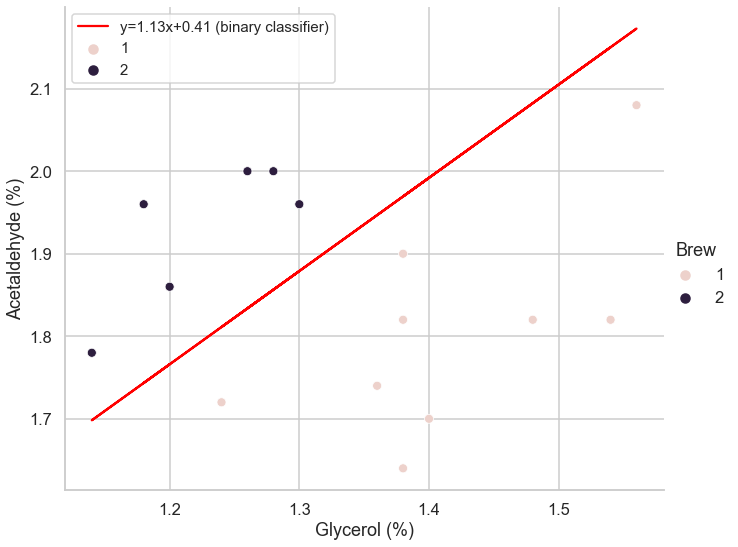

In [3]:
# Preliminary visualisation of data (not required for LDA)

# Plot data

sns.set_style("whitegrid")
sns.set_context("talk")

g = sns.relplot(x="glycerol%", 
                y="acetaldehyde%", 
                data=brew_data, 
                kind="scatter", 
                hue="Brew", 
                height=8, 
                aspect=1.2)
ax = g.axes[0,0]

# Plot suggested binary classifier

ax.plot(brew_data["glycerol%"], 
        1.13*brew_data["glycerol%"] + 0.41, 
        'r', 
        label='y={:.2f}x+{:.2f} (binary classifier)'.format(1.13, 0.41))
ax.set_xlabel("Glycerol (%)")
ax.set_ylabel("Acetaldehyde (%)")
plt.legend(fontsize=15)
plt.show()

In [4]:
# Define predictor (X) and response (y) variables

X = brew_data[brew_data.columns]
y = brew_data.index

In [5]:
# Fit the LDA model

lda = LinearDiscriminantAnalysis()
lda.fit(X.values, y.values)

LinearDiscriminantAnalysis()

In [6]:
# Variance ratio shows 100% discrimination on 1 axis

lda.explained_variance_ratio_

array([1.])

In [7]:
# Define method to evaluate model

cv = RepeatedStratifiedKFold(n_splits=6, 
                             n_repeats=3,
                             random_state=1)

In [8]:
# Evaluate accuracy of model with 3 repeats of 10-fold cross-validation (as defined above)

scores = cross_val_score(lda, X, y, 
                         scoring='accuracy', 
                         cv=cv, n_jobs=-1)

print(np.mean(scores))    # model achieves a mean accuracy of 93.5%

0.9351851851851851


In [9]:
# Define new observation and predict Brew

new = [1.3, 1.8]

print('The new observation is predicted to be from Brew {}'.format\
      (lda.predict([new])[0]))    # model correctly predicts Brew 1

The new observation is predicted to be from Brew 1


In [10]:
# Loop over original dataset to predict brew:

for index, row in brew_data.iterrows():
    print('Predicted: Brew {}'.format(lda.predict([[row[0], row[1]]])[0]) + \
          '\tPrior: Brew {}'.format(index))

Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 1	Prior: Brew 1
Predicted: Brew 2	Prior: Brew 2
Predicted: Brew 2	Prior: Brew 2
Predicted: Brew 2	Prior: Brew 2
Predicted: Brew 2	Prior: Brew 2
Predicted: Brew 2	Prior: Brew 2
Predicted: Brew 2	Prior: Brew 2


## References

Haswell, S.J. (1992). Practical Guide to Chemometrics. Marcel Dekker Inc., New York.